<a href="https://colab.research.google.com/github/chaehchaeh/MajorAI-DL/blob/main/221107DL7_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##정규화
-오버피팅을 늦추고 모델이 학습데이터로부터 적절한 특징들을 학습하여 일반화 오차를 낮출 수 있는 방법

1) 데이터를 통한 정규화: 데이터 증강(Data augmentation)

2) 손실함수를 통한 정규화: 가중치 감쇠(weight decay)

3) 신경망 계층을 통한 정규화: 드랍아웃, 배치정규화(Batch normalization), 
계층정규화

4) 학습/추론 방식을 통한 정규화:학습 조기종료, 배깅&앙상블(bagging&ensemble)


####가중치 감쇠
:손실함수에 항을 추가하여 가중치가 감쇠되도록 하는 방법
-파이토치 옵티마이저 설정을 통해 구현가능
-weight_decay 매개변수가 손실함수의 하이퍼 파라미터 알파를 의미
-가중치의 요소값이 크기가 클수록 선형계층의 해당 입출력 노드간의 관계가 강함을 의미
-가중치의 L2노름이 작아지도록 하여 노드사이의 관계를 제한함

####L1노름을 사용한 방식: L1노름은 가중치 파라미터 값들이 회소(sparse)하도록 제한함



###데이터 증강(data Augmentation)-데이터를 통한 정규화
-데이터의 핵심적인 특징을 유지한 채 노이즈를 더하여 데이터 셋을 확장하는 방법
-수배에서 수십배의 데이터 확장이 가능
-노이즈에 더 강인한(robust)모델을 얻을 수 있음

####이미지 데이터 증강기법: 
소금과 후추 노이즈 추가: 하얗거나 검은 점을 무작위로 흩뿌리는 방법

회전(rotation), 이동(shifting), 뒤집기(flipping)

-생성(generative)모델을 이용한 증강

-생성모델은 데이터 셋의 분포자체를 학습하여 모델로부터 데이터 샘프로가 유사한 샘플들을 생성해낼 수 있는 모델

ex)생성적대 신경망(Generative Adversarial Networks,GAN), 오토인코더(Autoencoder)
####텍스트 데이터 증강기법:
단어의 생략: 일정 확률로 임의의 단어를 생략하는 방법

단어교환: 임의로 일정범위 내에서 단어를 교환하는 방법

단어이동:임의로 일정 범위 내에서 단어를 이동하는 방법
*참고) 언어에따라 문장구조가 다르므로 증강방법을 달리 적용해야함

오버피팅: 학습오차가 일반화 오차에 비해 현격하게 낮아지는 현상
모델(심층신경망)이 학습데이터의 불필요한 편향(bias)이나 노이즈까지 학습 함으로써 일반화 성능이 떨어짐


###드롭아웃-신경망계층을 통한 정규화
-신경망에 노이즈를 추가하는 개념
-임의의 노드를 일정확률(이항분포)로 드롭해서 학습에 참여하지 않도록 하는 방법
-학습과 추론(inference 또는 evaluation)방식의 차이:
드롭아웃은 학습할 때만 적용, 추론할 때는 모든 노드가 참여


In [2]:
-일반적으로 활성 함수와 다음 계층 사이에 하나의 계층으로 구현됨
layer-act-drop-layer
#예제코드
import torch.nn as nn
p=0.3
net=nn.Sequential(
    nn.Linear(300,200),
    nn.LeakyReLU(),
    nn.Dropout(p),
    nn.Linear(200,100),
    nn.LeakyReLU(),
    nn.Dropout(p),
    nn.Linear(100,50),
    nn.LeakyReLU(),
    nn.Dropout(p),
    nn.Linear(50,10)
)

SyntaxError: ignored

In [ ]:
#train,eval 함수를 이요해 학습모드와 추론모드 전환 필요
for epoch_idx in range(n_epochs):
    net.train()
    for iter_idx in range(n_train_iters):
        #Training procedure
    net.eval()
    for iter_idx in range(n_valid_iters):
        #Validation procedure
    
#참고) 드롭아웃 적용시 일반화 성능이 개선되나 학습오차 증가 및 손실 값 수렴 속도가 저하될 수 있음

###배치 정규화(Batch Normalization)
-학습속도를 향상시키면서 일반화 성능 또한 개선될 수 있는 방법
-공변량 변화(convariance Shift) 문제해결을 위해 제안된
*공변량 변화문제: 학습 이 후, 다음 미니배치에 대한 각 계층 출력의 분포가 기존과 다르게 바뀌는 문제가 발생하여 학습 효율과 성능개선이 저하됨
배치정규화수식: 미니배치를 단위 가우시안 분포로 바꾸는 표준 정규 분포화를 수행하고 스케일 및 이동연산 적용
***추론시에는 들어오는 샘플들에 대한이동평균과 이에따른 표준편차를 이용해 표준정규분포화 수행

In [ ]:
#배치정규화는 신경망 내부에 계층으로 구현됨
##배치정규화를 활용하게 될 경우 드롭아웃을 사용하지 않는 경우가 많음
#예제코드:


In [4]:
#정규화 구현
##필요한 라이브러리 불러오기
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torchvision import datasets, transforms

In [5]:
#데이터 셋 불러오기 및 입출력 크기 계산
train=datasets.MNIST(
    '../data', train=True, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
    ]),
)
test=datasets.MNIST(
    '../data', train=False,
    transform=transforms. Compose([
        transforms.ToTensor(),
    ]),
)
x=train.data.float()/255.
y=train.targets

x=x.view(x.size(0),-1)
print(x.shape,y.shape)

input_size=x.size(-1)
output_size=int(max(y))+1

print('input_size:%d, output_size:%d'%(input_size, output_size))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw

torch.Size([60000, 784]) torch.Size([60000])
input_size:784, output_size:10


In [6]:
#학습, 검증 테스트 데이터 셋 구성
#train/valid ratio
ratios=[.8,.2]
train_cnt=int(x.size(0)*ratios[0])
valid_cnt=int(x.size(0)*ratios[1])
test_cnt=len(test.data)
cnts=[train_cnt,valid_cnt]
print("Train%d/Valid%d/Test%d samples."%(train_cnt,valid_cnt, test_cnt))
indices=torch.randperm(x.size(0))
x=torch.index_select(x,dim=0,index=indices)
y=torch.index_select(y,dim=0,index=indices)
x=list(x.split(cnts,dim=0))
y=list(y.split(cnts,dim=0))
x+=[(test.data.float()/255.).view(test_cnt,-1)]
y+=[test.targets]
for x_i,y_i in zip(x,y):
    print(x_i.size(),y_i.size())

Train48000/Valid12000/Test10000 samples.
torch.Size([48000, 784]) torch.Size([48000])
torch.Size([12000, 784]) torch.Size([12000])
torch.Size([10000, 784]) torch.Size([10000])


In [7]:
#기본 블록 정의
class Block(nn.Module):
    def __init__(self,
                input_size,
                output_size,
                use_batch_norm=True,
                dropout_p=.4):
        self.input_size=input_size
        self.output_size=output_size
        self.use_batch_norm=use_batch_norm
        self.dropout_p=dropout_p
        super().__init__()
        def get_regularizer(use_batch_norm,size):
            return nn.BatchNorm1d(size) if use_batch_norm else nn.Dropout(dropout_p)
        self.block=nn.Sequential(
            nn.Linear(input_size,output_size),
            nn.LeakyReLU(),
            get_regularizer(use_batch_norm,output_size),
        )
    def forward(self,x):
        y=self.block(x)
        return y

In [8]:
#모델(신경망)구성
class MyModel(nn.Module):
    def __init__(self,
                 input_size,
                 output_size,
                 use_batch_norm=True,
                 dropout_p=.4):
        super().__init__()

        self.layers=nn.Sequential(
            Block(input_size,500,use_batch_norm,dropout_p),
            Block(500,400,use_batch_norm,dropout_p),
            Block(400,300,use_batch_norm,dropout_p),
            Block(300,200,use_batch_norm,dropout_p),
            Block(200,100,use_batch_norm,dropout_p),
            Block(100,50,use_batch_norm,dropout_p),
            nn.Linear(50,output_size),
            nn.LogSoftmax(dim=-1)
        )
    def forward(self,x):
        y=self.layers(x)
        return y

In [9]:
#모델 선언 및 출력
model=MyModel(input_size,
              output_size,
              use_batch_norm=True)
print(model)

#옵티마이저 및 손실함수 설정
optimizer=optim.Adam(model.parameters())
crit=nn.NLLLoss()

MyModel(
  (layers): Sequential(
    (0): Block(
      (block): Sequential(
        (0): Linear(in_features=784, out_features=500, bias=True)
        (1): LeakyReLU(negative_slope=0.01)
        (2): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (1): Block(
      (block): Sequential(
        (0): Linear(in_features=500, out_features=400, bias=True)
        (1): LeakyReLU(negative_slope=0.01)
        (2): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): Block(
      (block): Sequential(
        (0): Linear(in_features=400, out_features=300, bias=True)
        (1): LeakyReLU(negative_slope=0.01)
        (2): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (3): Block(
      (block): Sequential(
        (0): Linear(in_features=300, out_features=200, bias=True)
        (1): LeakyReLU(negative_slope=0.01)
        (2): BatchNorm1d(200, e

In [12]:
#GPU 사용 설정
device=torch.device('cpu')
if torch.cuda.is_available():
    device=torch.device('cuda')
model=model.to(device)
x=[x_i.to(device) for x_i in x]
y=[y_i.to(device) for y_i in y]
#하이퍼 파라미터 및 학습을 위한 변수 설정
n_epochs=1000
batch_size=256
print_interval=10

lowest_loss=np.inf
best_model=None

early_stop=50
lowest_epoch=np.inf

In [22]:
#학습시작
train_history,valid_history=[],[]
for i in range(n_epochs):
    model.train()

    indices=torch.randperm(x[0].size(0)).to(device)
    x_=torch.index_select(x[0],dim=0,index=indices)
    y_=torch.index_select(y[0],dim=0,index=indices)

    x_=x_.split(batch_size,dim=0)
    y_=y_.split(batch_size,dim=0)

    train_loss,valid_loss=0,0
    y_hat=[]

    for x_i,y_i in zip(x_,y_):
        y_hat_i= model(x_i)
        loss=crit(y_hat_i,y_i.squeeze())

        optimizer.zero_grad()
        loss.backward()

        optimizer.step()
        train_loss+=float(loss)

    train_loss=train_loss/len(x_)

#학습시작: 검증
    model.eval()
    with torch.no_grad():
        x_=x[1].split(batch_size,dim=0)
        y_=y[1].split(batch_size,dim=0)

        valid_loss=0

        for x_i,y_i in zip(x_,y_):
            y_hat_i=model(x_i)
            loss=crit(y_hat_i, y_i.squeeze())

            valid_loss+=float(loss)
            y_hat+=[y_hat_i]
    valid_loss=valid_loss/len(x_)

    train_history+=[train_loss]
    valid_history+=[valid_loss]

    if (i+1)% print_interval==0:
        print('Epoch%d: train loss=%.4e valid_loss=%.4e lowest_loss=%.4e'%
(
                  i+1,
               train_loss,
               valid_loss,
               lowest_loss,
              )
              )
        
        #학습시작:검증
    if valid_loss<=lowest_loss:
        lowest_loss=valid_loss
        lowest_epoch=i

        best_model=deepcopy(model.state_dict())
    else:
        if early_stop>0 and lowest_epoch + early_stop<i+1:
            print("There is no improvement during last %d epochs."% early_stop)
            break

print("The best validation loss from epoch %d: %.4e"%(lowest_epoch+1,lowest_loss))
model.load_state_dict(best_model)

Epoch10: train loss=6.0549e-04 valid_loss=1.0097e-01 lowest_loss=7.9528e-02
Epoch20: train loss=7.9567e-04 valid_loss=9.1514e-02 lowest_loss=7.9528e-02
Epoch30: train loss=8.2963e-04 valid_loss=1.0170e-01 lowest_loss=7.9528e-02
Epoch40: train loss=3.3897e-03 valid_loss=1.0196e-01 lowest_loss=7.9528e-02
Epoch50: train loss=2.8384e-03 valid_loss=9.5138e-02 lowest_loss=7.9528e-02
Epoch60: train loss=1.9568e-03 valid_loss=1.0244e-01 lowest_loss=7.9528e-02
Epoch70: train loss=4.7464e-04 valid_loss=9.6219e-02 lowest_loss=7.9528e-02
There is no improvement during last 50 epochs.
The best validation loss from epoch 27: 7.9528e-02


<All keys matched successfully>

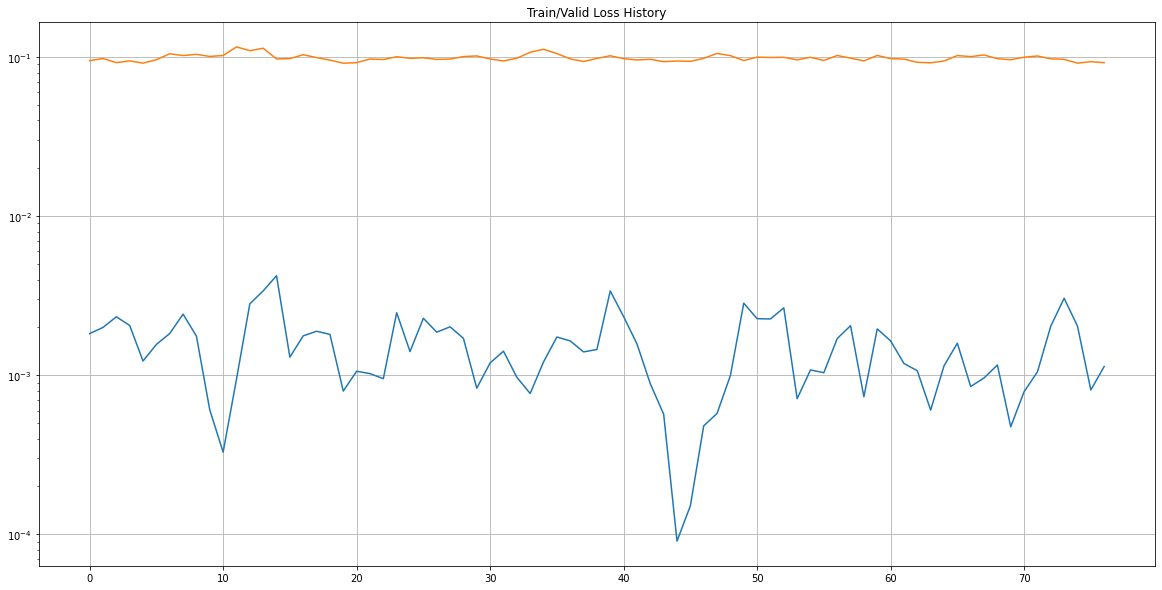

In [24]:
#손실곡선 확인
plot_from=0

plt.figure(figsize=(20,10))
plt.grid(True)
plt.title("Train/Valid Loss History")
plt.plot(
    range(plot_from,len(train_history)),train_history[plot_from:],
    range(plot_from,len(valid_history)),valid_history[plot_from:],
)
plt.yscale('log')
plt.show()